In [21]:
import numpy as np
from tqdm import tqdm
from matplotlib.pylab import plt

Задача 3.3. В различных финансовых и экономических приложениях используется mean-reversion model:

𝑑𝑋(𝑡)=𝑎(𝑋− 𝑋(𝑡))𝑑𝑡+𝑏𝑑𝑤(𝑡), 𝑎,𝑏>0−параметры, 𝑋(0)= 𝑋0. (3.23)

3) Пусть a = 1, b=2, 𝑋0=1,𝑇=1,𝑋=10. Методом Эйлера-Маруямы c шагом h=0,000001 смоделировать и вывести на один график 10 различных траекторий 𝑋(𝑡). Повторить это задание для a = 0,001, b=0,002, 𝑋0=1,𝑇=1,𝑋=0.

Метод Эйлера-Маруямы: 𝑌𝑚𝑛= 𝑌𝑚−1𝑛+ 𝑎(𝑌𝑚−1𝑛,𝜏𝑚−1𝑛)ℎ+ b(𝑌𝑚−1𝑛,𝜏𝑚−1𝑛) (𝑤(𝜏𝑚𝑛)−𝑤(𝜏𝑚−1𝑛)), 𝑌0𝑛=𝑋0 (3.27)

Случай a = 1, b=2, 𝑋0=1,𝑇=1,𝑋=10

In [2]:
a = 1
b = 2
X = 10
h = 1e-6

T = 1
T_start = 0

x_start = 1
y_start = 1
n = 10

Вспомогательные функции:

In [3]:
def a_func_1(a, X, y, t):
    return a * (X - y)

def b_func_1(b, y, t):
    return b

def dW(h):
    return np.random.normal(loc=0.0, scale=np.sqrt(h))

In [22]:
def plot_model(a, b, X, h, T, T_start, y_start, n, a_func, b_func, dW):
    grid = np.arange(T_start, T + h, h) # Сделаем сетку из различных T
    y_mas = np.zeros(grid.shape[0]) # пустой массив размерности сетки
    y_mas[0] = y_start
    for i in tqdm(range(n)):
      for j in range(1, grid.shape[0]):
          t_cur = grid[j - 1]
          y_last = y_mas[j - 1]
          y_mas[j] = y_last + a_func(a, X, y_last, t_cur) * h + b_func(b, y_last, t_cur) * dW(h)
      plt.plot(grid, y_mas)

100%|██████████| 10/10 [01:03<00:00,  6.36s/it]


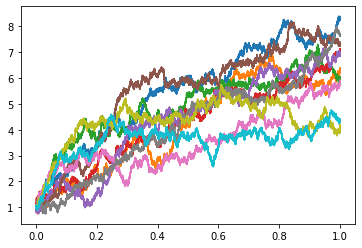

In [5]:
plot_model(a, b, X, h, T, T_start, y_start, n, a_func_1, b_func_1, dW)

Случай a = 0,001, b=0,002, 𝑋0=1,𝑇=1,𝑋=0

In [6]:
h = 1e-6
a = 0.001
b = 0.002
X = 0

T_start = 0
T = 1

x_start = 1
y_start = 1
n = 10

100%|██████████| 10/10 [00:59<00:00,  5.99s/it]


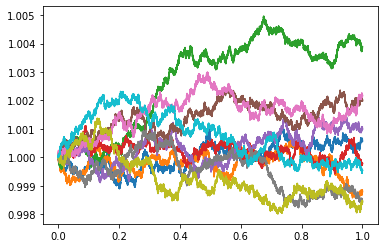

In [7]:
plot_model(a, b, X, h, T, T_start, y_start, n, a_func_1, b_func_1, dW)

4) Пусть a = 1, b=2, 𝑋0=1,𝑇=1,𝑋=10. Методом Эйлера-Маруямы c шагом h=0,0001 смоделировать 10 000 траекторий. По этому пучку построить выборочные оценки функ-ции математического ожидания и дисперсии. Вывести графики этих оценок и их теоре-тических значений.

In [8]:
a = 1
b = 2
X = 10
h = 1e-4

T = 1
T_start = 0

x_start = 1
y_start = 1
n = 10000

In [23]:
def plot_model_get_m_and_k(a, b, X, h, T, T_start, y_start, n, a_func, b_func, dW):
    grid = np.arange(T_start, T + h, h) # Сделаем сетку из различных T
    y_mas = np.zeros(grid.shape[0]) # пустой массив размерности сетки
    m_t = np.zeros(grid.shape[0])
    k_t = np.zeros(grid.shape[0])
    y_mas[0] = y_start
    for i in tqdm(range(n)):
      for j in range(1, grid.shape[0]):
          t_cur = grid[j - 1]
          y_last = y_mas[j - 1]
          y_mas[j] = y_last + a_func(a, X, y_last, t_cur) * h + b_func(b, y_last, t_cur) * dW(h)
      m_t += y_mas
      k_t += (y_mas ** 2)
      plt.plot(grid, y_mas)
    plt.show()
    return m_t, k_t

100%|██████████| 10000/10000 [11:18<00:00, 14.75it/s]


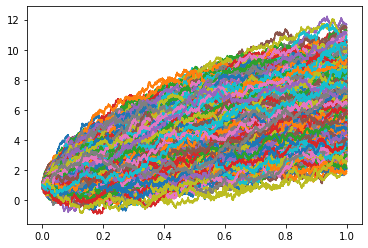

In [10]:
m_t, k_t = plot_model_get_m_and_k(a, b, X, h, T, T_start, y_start, n, a_func_1, b_func_1, dW)

Посчитаем теоритические МО и диспресию

In [11]:
grid = np.arange(T_start, T + h, h)
th_mean = y_start * np.exp(-a * grid) + X * (1 - np.exp(-a * grid))
th_var = ((b**2) / (2 * a)) * (1 - np.exp(-2 * a * grid))

Через схему получилось так:

In [12]:
mean = np.array(m_t) / n
var = np.array(k_t) / n - (mean ** 2)

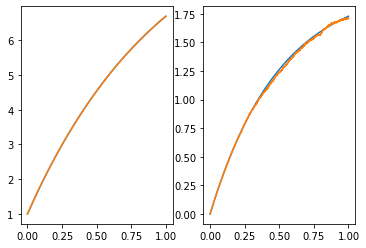

In [13]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(grid, th_mean, label='по теории')
axes[0].plot(grid, mean, label='по схеме')
axes[1].plot(grid, th_var, label='по теории')
axes[1].plot(grid, var, label='по схеме')

Задача 3.4. Рассмотрим уравнение Самуэльсона (3.6) с параметрами a = 1, b=2, 𝑋0=1,𝑇=1.

1) Методом Эйлера-Маруямы c шагом h=0,000001 смоделировать и вывести на один гра-фик 10 различных траекторий 𝑋(𝑡).

2) Методом Эйлера-Маруямы c шагом h=0,0001 смоделировать 10 000 траекторий. По этому пучку построить выборочные оценки функции математического ожидания и дис-персии. Вывести графики этих оценок и их теоретических значений.

3) Решить задачи 1) и 2) для уравнения (3.6) с параметрами a = -1, b=2, 𝑋0=1,𝑇=1.

1) Методом Эйлера-Маруямы c шагом h=0,000001 смоделировать и вывести на один гра-фик 10 различных траекторий 𝑋(𝑡).

In [24]:
def a_func_2(a, X, y, t):
    return a * y


def b_func_2(b, y, t):
    return b * y

In [15]:
a = 1
b = 2
X = 10
h = 1e-6

T = 1
T_start = 0

x_start = 1
y_start = 1
n = 10

100%|██████████| 10/10 [01:03<00:00,  6.35s/it]


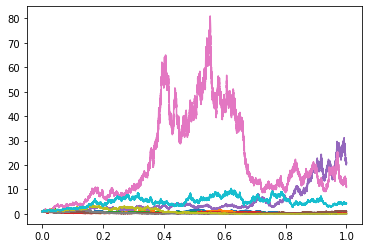

In [16]:
plot_model(a, b, X, h, T, T_start, y_start, n, a_func_2, b_func_2, dW)

2) Методом Эйлера-Маруямы c шагом h=0,0001 смоделировать 10 000 траекторий. По этому пучку построить выборочные оценки функции математического ожидания и дис-персии. Вывести графики этих оценок и их теоретических значений.

100%|██████████| 10000/10000 [11:19<00:00, 14.72it/s]


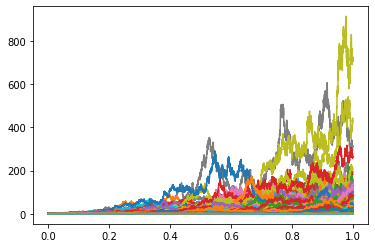

In [17]:
n = 10000
h = 1e-4
m_t, k_t = plot_model_get_m_and_k(a, b, X, h, T, T_start, y_start, n, a_func_2, b_func_2, dW)

Посчитаем теоритические МО и диспресию

In [18]:
grid = np.arange(T_start, T + h, h)
th_mean = y_start * np.exp(a * grid)
th_var = (y_start ** 2) * np.exp(2 * a * grid) * (np.exp((b ** 2) * grid) - 1)

Через схему получилось так:

In [19]:
mean = np.array(m_t) / n
var = np.array(k_t) / n - (mean ** 2)

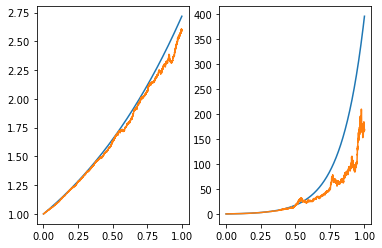

In [20]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(grid, th_mean, label='по теории')
axes[0].plot(grid, mean, label='по схеме')
axes[1].plot(grid, th_var, label='по теории')
axes[1].plot(grid, var, label='по схеме')

3) Решить задачи 1) и 2) для уравнения (3.6) с параметрами a = -1, b=2, 𝑋0=1,𝑇=1.

In [25]:
a = -1
b = 2
X = 10
h = 1e-6

T = 1
T_start = 0

x_start = 1
y_start = 1
n = 10

100%|██████████| 10/10 [01:03<00:00,  6.40s/it]


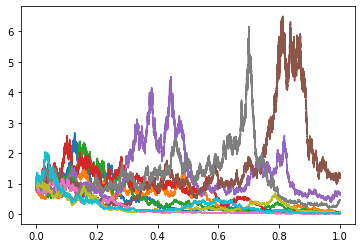

In [26]:
plot_model(a, b, X, h, T, T_start, y_start, n, a_func_2, b_func_2, dW)

100%|██████████| 10000/10000 [11:32<00:00, 14.44it/s]


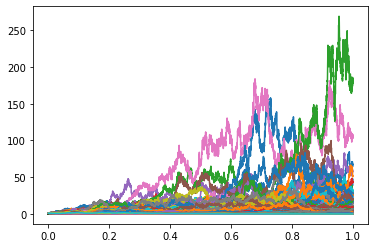

In [27]:
n = 10000
h = 1e-4
m_t, k_t = plot_model_get_m_and_k(a, b, X, h, T, T_start, y_start, n, a_func_2, b_func_2, dW)

In [28]:
grid = np.arange(T_start, T + h, h)
th_mean = y_start * np.exp(a * grid)
th_var = (y_start ** 2) * np.exp(2 * a * grid) * (np.exp((b ** 2) * grid) - 1)

In [29]:
mean = np.array(m_t) / n
var = np.array(k_t) / n - (mean ** 2)

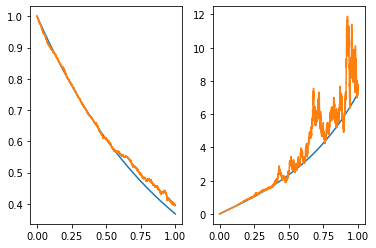

In [30]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(grid, th_mean, label='по теории')
axes[0].plot(grid, mean, label='по схеме')
axes[1].plot(grid, th_var, label='по теории')
axes[1].plot(grid, var, label='по схеме')